# Proyecto de análisis de datos NBA

Este proyecto se va a basar en limpiar y analizar un archivo .CSV con datos de jugadores de la NBA.
vamos a ver una breve limpieza de datos que nos va a ayudar a poder trabajar de forma efectiva con los datos para luego visualizar algunas gráficas.

Empezamos importando las librerías que vamos a utilizar.

In [216]:
## Importo las librerías a usar en este análisis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A continuación, abrimos el archivo "Player Totals.csv" que es el archivo con el cual vamos a trabajar.

In [217]:
## Abro el archivo 'Player Totals.csv' y lo convierto en dataframe para poder trabajar con esos datos.
df_player_totals=pd.read_csv('Player Totals.csv')

Ahora, con el archivo abierto, vamos a proceder con la limpieza de datos, voy a resumír los siguientes pasos en este momento para así luego se vea el proceso sin inconvenientes:

1. Nos fijamos cuantas filas y columnas tiene el dataframe
2. Observamos las primeras 5 filas para ver como vienen los datos.
3. usamos la función "columns" para ver los titulos de las columnas.
4. Eliminamos las columnas que no nos sirven para este análisis.

In [218]:
## Veo cuantas filas y columnas tiene el dataframe.
df_player_totals.shape

(31870, 35)

In [219]:
## Observo las primeras 5 filas para ver un poco los datos.
df_player_totals.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,31136,2024,5025,A.J. Green,NaN,SG,24.0,2,NBA,MIL,...,0.895,9.0,55.0,64.0,30,9.0,4.0,12.0,49,252
1,31137,2024,5026,A.J. Lawson,NaN,SG,23.0,2,NBA,DAL,...,0.652,14.0,36.0,50.0,20,10.0,3.0,14.0,22,136
2,31138,2024,5027,AJ Griffin,NaN,SF,20.0,2,NBA,ATL,...,1.000,2.0,16.0,18.0,5,1.0,2.0,8.0,6,48
3,31139,2024,4219,Aaron Gordon,NaN,PF,28.0,10,NBA,DEN,...,0.658,174.0,297.0,471.0,259,56.0,45.0,105.0,142,1013
4,31140,2024,4582,Aaron Holiday,NaN,PG,27.0,6,NBA,HOU,...,0.921,23.0,100.0,123.0,140,42.0,6.0,53.0,125,514


In [220]:
## Veo los nombres de las diferentes columnas que hay en el dataframe.
df_player_totals.columns

Index(['seas_id', 'season', 'player_id', 'player', 'birth_year', 'pos', 'age',
       'experience', 'lg', 'tm', 'g', 'gs', 'mp', 'fg', 'fga', 'fg_percent',
       'x3p', 'x3pa', 'x3p_percent', 'x2p', 'x2pa', 'x2p_percent',
       'e_fg_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [221]:
## Elimino las filas las cuales no me sirven para este análisis.
df_player_totals.drop(['seas_id','birth_year','gs'],axis=1,inplace=True)

Ya con estos pocos pasos de limpieza de datos vamos a fijarnos cuantas ligas hay en este dataframe. Esto se logra llamando a la columna de liga "lg" y utilizando la funcion ".value_counts()".
Esto nos dice que hay 3 ligas en este dataframe, por lo que vamos a crear un nuevo dataframe filtrado por la liga que nos interesa, en este caso sería la NBA.

In [222]:
## Me fijo cuantos datos diferentes hay en la columna 'lg'.
df_player_totals['lg'].value_counts()

lg
NBA    29650
ABA     1638
BAA      582
Name: count, dtype: int64

In [223]:
## Creo un nuevo dataframe filtrando el anterior por los jugadores que jueguen o jugaban en la NBA.
df_player_totals_nba=df_player_totals[df_player_totals['lg']=='NBA']

Luego de haber filtrado por la liga que queremos analizar, vamos a hacer una breve limpieza de datos por las dudas haya algún dato duplicado, por lo que vamos a llamar a la funcion "drop?duplicates()" donde nos va a eliminar las filas duplicadas y se va a quedar con una de ellas.

In [224]:
## Elimino datos duplicados dentro del nuevo dataframe.
df_player_totals_nba.drop_duplicates(inplace=True)

C:\Users\mateo\AppData\Local\Temp\ipykernel_11564\4146507471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player_totals_nba.drop_duplicates(inplace=True)


Con "shape" vemos que no había datos duplicados, ya que cuando usamos la función "value_counts()" pudimos ver que había 29650 filas con el valor "NBA" en la columna "lg"(la misma cantidad de filas que hay en este nuevo dataframe filtrado).

In [225]:
## Me fijo cuantas filas y columnas me quedaron.
df_player_totals_nba.shape

(29650, 32)

In [226]:
## Observo las primeras 5 filas del dataframe filtrado.
df_player_totals_nba.head()

,season,player_id,player,pos,age,experience,lg,tm,g,mp,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2024,5025,A.J. Green,SG,24.0,2,NBA,MIL,56,614.0,...,0.895,9.0,55.0,64.0,30,9.0,4.0,12.0,49,252
1,2024,5026,A.J. Lawson,SG,23.0,2,NBA,DAL,42,311.0,...,0.652,14.0,36.0,50.0,20,10.0,3.0,14.0,22,136
2,2024,5027,AJ Griffin,SF,20.0,2,NBA,ATL,20,171.0,...,1.000,2.0,16.0,18.0,5,1.0,2.0,8.0,6,48
3,2024,4219,Aaron Gordon,PF,28.0,10,NBA,DEN,73,2297.0,...,0.658,174.0,297.0,471.0,259,56.0,45.0,105.0,142,1013
4,2024,4582,Aaron Holiday,PG,27.0,6,NBA,HOU,78,1269.0,...,0.921,23.0,100.0,123.0,140,42.0,6.0,53.0,125,514


A continuación, creamos un nuevo dataframe agrupado por año, teniendo la suma de las métricas básicas, como por ejemplo pueden ser los puntos, las asistencias, los minutos jugados, entre otros, y además, teniendo la media de los porcentajes, como por ejemplo la media de los porcentajes de tiro de 3 puntos. 

In [227]:
## Creo un nuevo dataframe agrupado por jugador, quedándome con la suma de sus estadísticas más normales(pts, ast, etc.)
## y quedándome con los promedios de los porcentajes.
df_agrupado_x_temporada=df_player_totals_nba.groupby('season').agg({
    'g': 'sum',
    'mp': 'sum',
    'fg': 'sum',
    'fga': 'sum',
    'fg_percent': 'mean',
    'x3p': 'sum',
    'x3pa': 'sum',
    'x3p_percent': 'mean',
    'ft': 'sum',
    'fta': 'sum',
    'ft_percent': 'mean',
    'orb': 'sum',
    'drb': 'sum',
    'trb': 'sum',
    'ast': 'sum',
    'stl': 'sum',
    'blk': 'sum',
    'tov': 'sum',
    'pf': 'sum',
    'pts': 'sum'
}).reset_index()

Exploramos un poco el nuevo Dataframe para ver que esté todo en orden, y vemos que al usar la función "info()" nos damos cuenta que la columna del porcentaje de triples tiene nulos, esto se debe a que el dataframe tiene temporadas anteriores a cuando se implementó la linea de 3 puntos en la NBA. Por lo que me tomé el atrevimiento de cambiar los valores nulos por 0.

In [228]:
## Observo las primeras 5 filas del nuevo dataframe para ver si todo está bien.
df_agrupado_x_temporada.head()

,season,g,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,ft,...,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1950,13380,0.0,36436,108515,0.318109,0.0,0.0,NaN,30690,...,0.683685,0.0,0.0,0.0,25496,0.0,0.0,0.0,35877,103562
1,1951,8092,0.0,24622,69509,0.332085,0.0,0.0,NaN,20061,...,0.702043,0.0,0.0,38508.0,17102,0.0,0.0,0.0,22849,69305
2,1952,6612,172005.0,20921,57352,0.343971,0.0,0.0,NaN,17291,...,0.690603,0.0,0.0,33945.0,15405,0.0,0.0,0.0,19287,59133
3,1953,7386,194943.0,22432,61096,0.337475,0.0,0.0,NaN,20214,...,0.702360,0.0,0.0,36854.0,16766,0.0,0.0,0.0,22984,65078
4,1954,6679,171149.0,19852,53560,0.341582,0.0,0.0,NaN,16448,...,0.680603,0.0,0.0,33287.0,14342,0.0,0.0,0.0,18208,56152


In [229]:
## Me fijo las filas y las columnas de este nuevo dataframe.
df_agrupado_x_temporada.shape

(75, 21)

In [230]:
## Veo los nombres de las columnas.
df_agrupado_x_temporada.columns

Index(['season', 'g', 'mp', 'fg', 'fga', 'fg_percent', 'x3p', 'x3pa',
       'x3p_percent', 'ft', 'fta', 'ft_percent', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [231]:
## Me informo del dataframe, viendo si hay datos nulos y de que tipo es cada columna.
df_agrupado_x_temporada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       75 non-null     int64  
 1   g            75 non-null     int64  
 2   mp           75 non-null     float64
 3   fg           75 non-null     int64  
 4   fga          75 non-null     int64  
 5   fg_percent   75 non-null     float64
 6   x3p          75 non-null     float64
 7   x3pa         75 non-null     float64
 8   x3p_percent  45 non-null     float64
 9   ft           75 non-null     int64  
 10  fta          75 non-null     int64  
 11  ft_percent   75 non-null     float64
 12  orb          75 non-null     float64
 13  drb          75 non-null     float64
 14  trb          75 non-null     float64
 15  ast          75 non-null     int64  
 16  stl          75 non-null     float64
 17  blk          75 non-null     float64
 18  tov          75 non-null     float64
 19  pf        

In [232]:
## Tomo la decisión de que a las columnas que tienen datos nulos, les reemplazo los nulos por su media.
df_agrupado_x_temporada['x3p_percent'].fillna(0,inplace=True)

C:\Users\mateo\AppData\Local\Temp\ipykernel_11564\3307091084.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agrupado_x_temporada['x3p_percent'].fillna(0,inplace=True)


In [233]:
## Me fijo si todas las columnas ya no tienen nulos.
df_agrupado_x_temporada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       75 non-null     int64  
 1   g            75 non-null     int64  
 2   mp           75 non-null     float64
 3   fg           75 non-null     int64  
 4   fga          75 non-null     int64  
 5   fg_percent   75 non-null     float64
 6   x3p          75 non-null     float64
 7   x3pa         75 non-null     float64
 8   x3p_percent  75 non-null     float64
 9   ft           75 non-null     int64  
 10  fta          75 non-null     int64  
 11  ft_percent   75 non-null     float64
 12  orb          75 non-null     float64
 13  drb          75 non-null     float64
 14  trb          75 non-null     float64
 15  ast          75 non-null     int64  
 16  stl          75 non-null     float64
 17  blk          75 non-null     float64
 18  tov          75 non-null     float64
 19  pf        

Luego de tener todo el dataframe sin nulos, podemos crear algunas métricas avanzadas como la eficiencia de tiros reales(%TS), la eficiencia ofensiva individual(ORtg) y la eficiencia en tiros de campo efectiva(FGe%).

* %TS: La eficiencia global en la anotación, teniendo en cuenta canastas de campo, tiros de tres puntos y tiros libres. Es una medida completa del rendimiento en anotación. Un TS% alto indica que el jugador convierte sus oportunidades de tiro de manera eficiente, independientemente del tipo de lanzamiento.

* FGe%: La eficiencia en tiros de campo ajustada por el valor extra del tiro de tres puntos (al contabilizar su mayor valor en puntos). Una eFG% alta refleja una mayor calidad en las oportunidades de tiro, especialmente si se aprovechan bien los tiros de tres.

In [234]:
## Creo la métrica de 'True Shooting %', que es la eficiencia de tiros reales.
df_agrupado_x_temporada['%TS']=df_agrupado_x_temporada['pts']/(2*(df_agrupado_x_temporada['fga']+0.44*df_agrupado_x_temporada['fta']))

In [235]:
## Creo la métrica que mide la eficiencia de tiros de campo efectiva.
df_agrupado_x_temporada['FGe%']=(df_agrupado_x_temporada['fg']+0.5*df_agrupado_x_temporada['x3p'])/df_agrupado_x_temporada['fga']

In [236]:
df_agrupado_x_temporada.rename(columns={'x3p_percent':'%3p','fg_percent':'fg%','ft_percent':'ft%'},inplace=True)

In [237]:
## Observo las primeras 5 filas del dataframe para ver que las métricas estén bien.
df_agrupado_x_temporada.head()

,season,g,mp,fg,fga,fg%,x3p,x3pa,%3p,ft,...,drb,trb,ast,stl,blk,tov,pf,pts,%TS,FGe%
0,1950,13380,0.0,36436,108515,0.318109,0.0,0.0,0.0,30690,...,0.0,0.0,25496,0.0,0.0,0.0,35877,103562,0.405923,0.335769
1,1951,8092,0.0,24622,69509,0.332085,0.0,0.0,0.0,20061,...,0.0,38508.0,17102,0.0,0.0,0.0,22849,69305,0.424896,0.354228
2,1952,6612,172005.0,20921,57352,0.343971,0.0,0.0,0.0,17291,...,0.0,33945.0,15405,0.0,0.0,0.0,19287,59133,0.436437,0.364782
3,1953,7386,194943.0,22432,61096,0.337475,0.0,0.0,0.0,20214,...,0.0,36854.0,16766,0.0,0.0,0.0,22984,65078,0.442577,0.367160
4,1954,6679,171149.0,19852,53560,0.341582,0.0,0.0,0.0,16448,...,0.0,33287.0,14342,0.0,0.0,0.0,18208,56152,0.440211,0.370650


Ya, con todas las métricas sin nulos y creadas, procedemos a crear gráficos.
El primer gráfico nos es sobre el True Shooting (%TS), que nos dice que esta métrica há subído cada año, esto nos dice que cada año los jugadores son mas efectivos a la hora de tomar sus tiros y que deciden mejor cuando tirar.

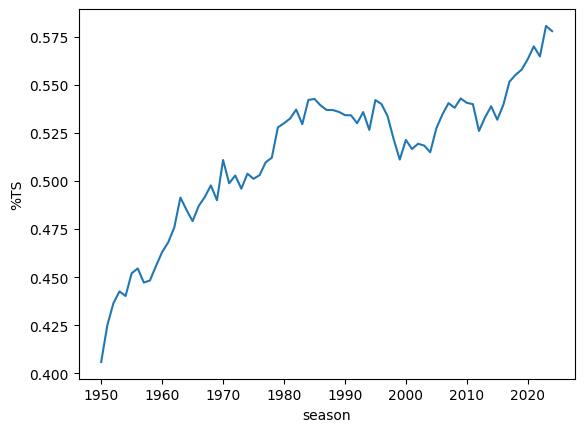

In [238]:
## Ya con todos los datos limpios, y con las variables creadas, procedo a crear unos gráficos.
## creo un gráfico que visualiza la eficiencia de tiros reales a lo largo de los años.
sns.lineplot(df_agrupado_x_temporada,x='season',y='%TS')
plt.show()

El proximo gráfico es sobre la eficiencia en tiros de campo efectiva, que al igual que el True Shooting vá en aumento, esto se debe como dije con el gráfico anterior a que los jugadores ahora toman mejores decisiones a la hora de tomar sus tiros, además, en esta epoca hay muchos jugadores triplístas, a lo que hace que solo se centren en anotar de 3 puntos una vez le llega la pelota, por lo que no necesitan hacer otros tiros. Dato no curioso, es que el True Shooting, como la eficiencia de tiros de campo efectiva van de la mano, con la cualidad de que la eficiencia de tiros de campo efectiva es menor al True Shooting.

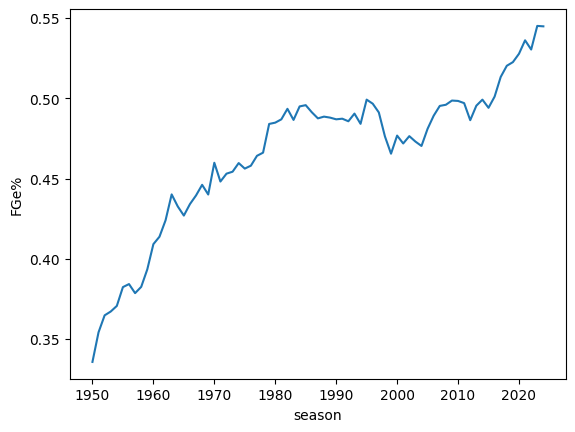

In [239]:
## Creo otro gráfico, pero este mide la eficiencia de campo efectiva a lo largo de los años.
sns.lineplot(df_agrupado_x_temporada,x='season',y='FGe%')
plt.show()

El gráfico a continuación es muy interesante, ya que se vé como a lo largo de estos años, la cantidad de triples encestados es cada vez mayor, viendo una tendencia a que cada vez el juego se está llevando a tirar de lejos, así también, con esta evolución del juego hace que haya mas jugadores especializados en este area, es decir, en tirar de 3.

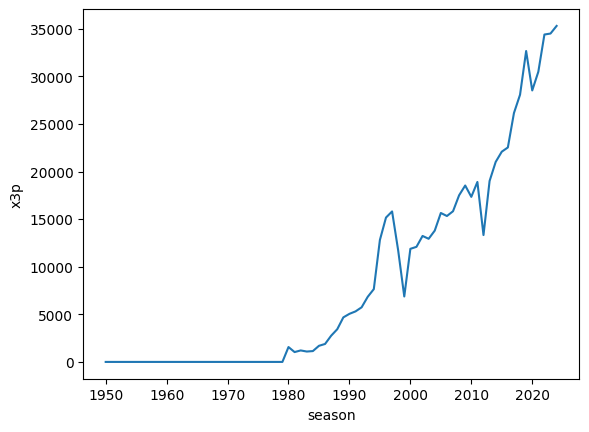

In [240]:
## Creo un último grafico en donde se visualiza la cantidad de tiros de 3 anotados a lo largo de los años.
sns.lineplot(df_agrupado_x_temporada,x='season',y='x3p')
plt.show()

Para concretar el análisis se me ocurrió hacer un gráfico de correlación, donde se pude ver que la gran mayorías de cosas están relacionadas entre sí.

In [241]:
matrix_corr=df_agrupado_x_temporada.corr()

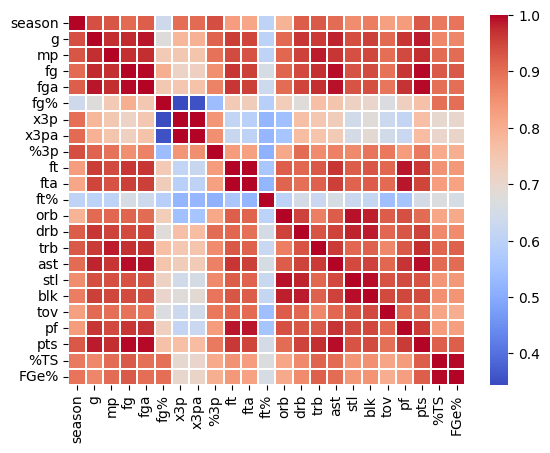

In [242]:
sns.heatmap(matrix_corr, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.show()